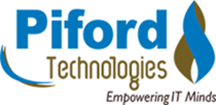

In [1]:
#!python -m pip install --upgrade pip

#!pip install tensorflow==2.3.1 

#!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

In [2]:
import torch # YOLOv5 implemented using pytorch

In [3]:
from IPython.display import Image #this is to render predictions

In [5]:
!git clone https://github.com/ultralytics/yolov5

In [5]:
%cd yolov5

D:\yolov5_traffic_sign_detection\yolov5


In [6]:
!pip install -r requirements.txt

# Divide the dataset in train and val folder. 

In [12]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = 'D:/yolov5_traffic_sign_detection/dataset/images/train'
valPath = 'D:/yolov5_traffic_sign_detection/dataset/images/val'
crsPath = 'D:/yolov5_traffic_sign_detection/data/ts/' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [13]:

trainimagePath = 'D:/yolov5_traffic_sign_detection/dataset/images/train'
trainlabelPath = 'D:/yolov5_traffic_sign_detection/dataset/labels/train'
valimagePath = 'D:/yolov5_traffic_sign_detection/dataset/images/val'
vallabelPath = 'D:/yolov5_traffic_sign_detection/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 




'D:/yolov5_traffic_sign_detection/dataset/images/val\\ts'

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory. 
### This file contains information required by YOLO to train the model on the custom data. 

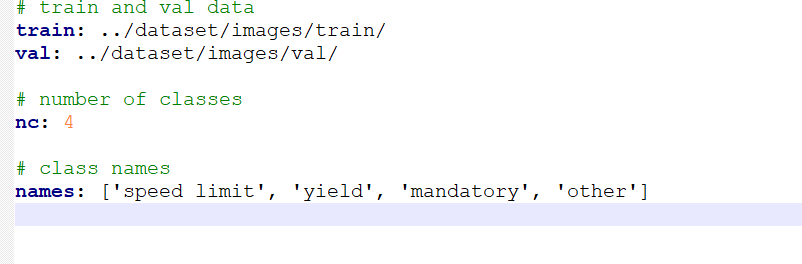

In [12]:
!python train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

github:  WARNING: code is out of date by 141 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Plotting labels... 

autoanchor: Analyzing anchors... anchors/target = 3.22, Best Possible Recall (BPR) = 1.0000
                 all         889         238    2.95e-05     0.00723    3.52e-07    5.52e-08
                 all         889         238    1.92e-05      0.0112    6.25e-07    1.63e-07
                 all         889         238     0.00171     0.00223    5.28e-05    9.43e-06
                 all         889         238    0.000782       0.032    0.000224     5.2e-05
                 all         889         238     0.00714       0.107     0.00446     0.00149
                 all         889         238      0.0587        0.15      0.0304     0.00963
                 all         889         238      0.0547       0.241      0.0451      0

From https://github.com/ultralytics/yolov5
   ec6ddbe..a270f7d  KalenMike-readme-update -> origin/KalenMike-readme-update
YOLOv5  v5.0-41-g4890499 torch 1.8.1+cpu CPU

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='dataset.yaml', device='', entity=None, epochs=30, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[415, 415], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs\\train\\exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-12 18:42:31.264594: I tensorflow/stream_executor/platform/default/dso_loader.cc:44

                 all         889         238      0.0523       0.332      0.0547      0.0219
                 all         889         238       0.563       0.185      0.0572      0.0242
                 all         889         238       0.179       0.317      0.0615      0.0203
                 all         889         238       0.124       0.355      0.0708       0.025
                 all         889         238       0.343        0.27      0.0747      0.0319
                 all         889         238       0.086       0.402      0.0857      0.0391
                 all         889         238       0.357       0.238      0.0796      0.0405
                 all         889         238       0.105       0.501      0.0951      0.0346
                 all         889         238      0.0969       0.496      0.0811      0.0319
                 all         889         238       0.149       0.433        0.13      0.0595
                 all         889         238       0.141       0.461  


 15                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 16           [-1, 4]  1         0  models.common.Concat                    [1]                           
 17                -1  1     90880  models.common.C3                        [256, 128, 1, False]          
 18                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 19          [-1, 14]  1         0  models.common.Concat                    [1]                           
 20                -1  1    296448  models.common.C3                        [256, 256, 1, False]          
 21                -1  1    590336  models.common.Conv                      [256, 256, 3, 2]              
 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  1   1182720  models.common.C3                        [512, 512, 1, False]          
 24      [17, 20, 23]  1     24273  

## At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

## Explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

In [19]:
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16660), started 3:38:43 ago. (Use '!kill 16660' to kill it.)

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

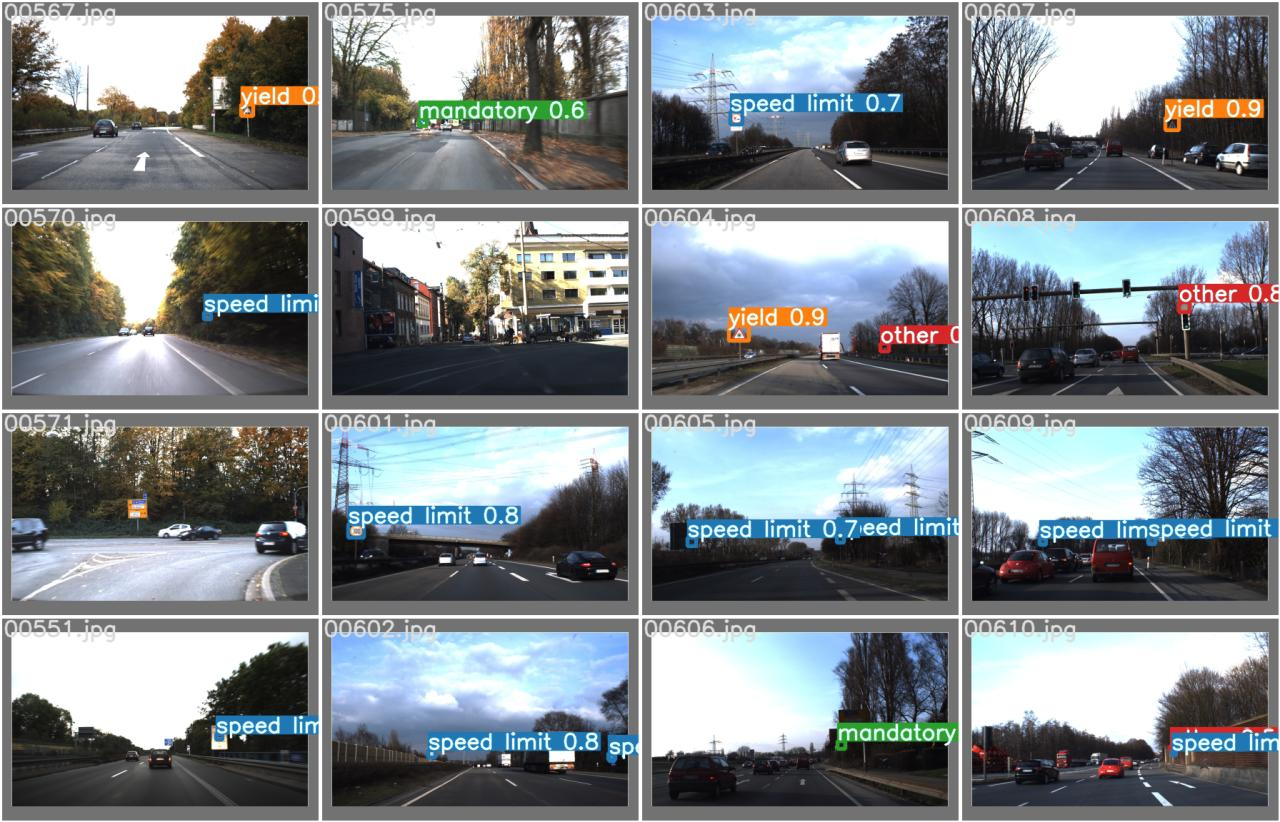

In [20]:
Image(filename='runs/train/exp2/test_batch2_pred.jpg', width=1000)


Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes. 

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [48]:
#!python detect.py --source runs/train/exp/testimg.jpg --weights runs/train/exp/weights/best.pt --conf 0.25

!python detect.py --source runs/train/exp2/a.jpg --weights best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='runs/train/exp2/a.jpg', update=False, view_img=False, weights=['best.pt'])
image 1/1 D:\yolov5_traffic_sign_detection\yolov5\runs\train\exp2\a.jpg: 384x640 2 speed limits, Done. (0.141s)
Results saved to runs\detect\exp4
Done. (0.193s)


YOLOv5  v5.0-41-g4890499 torch 1.8.1+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPS


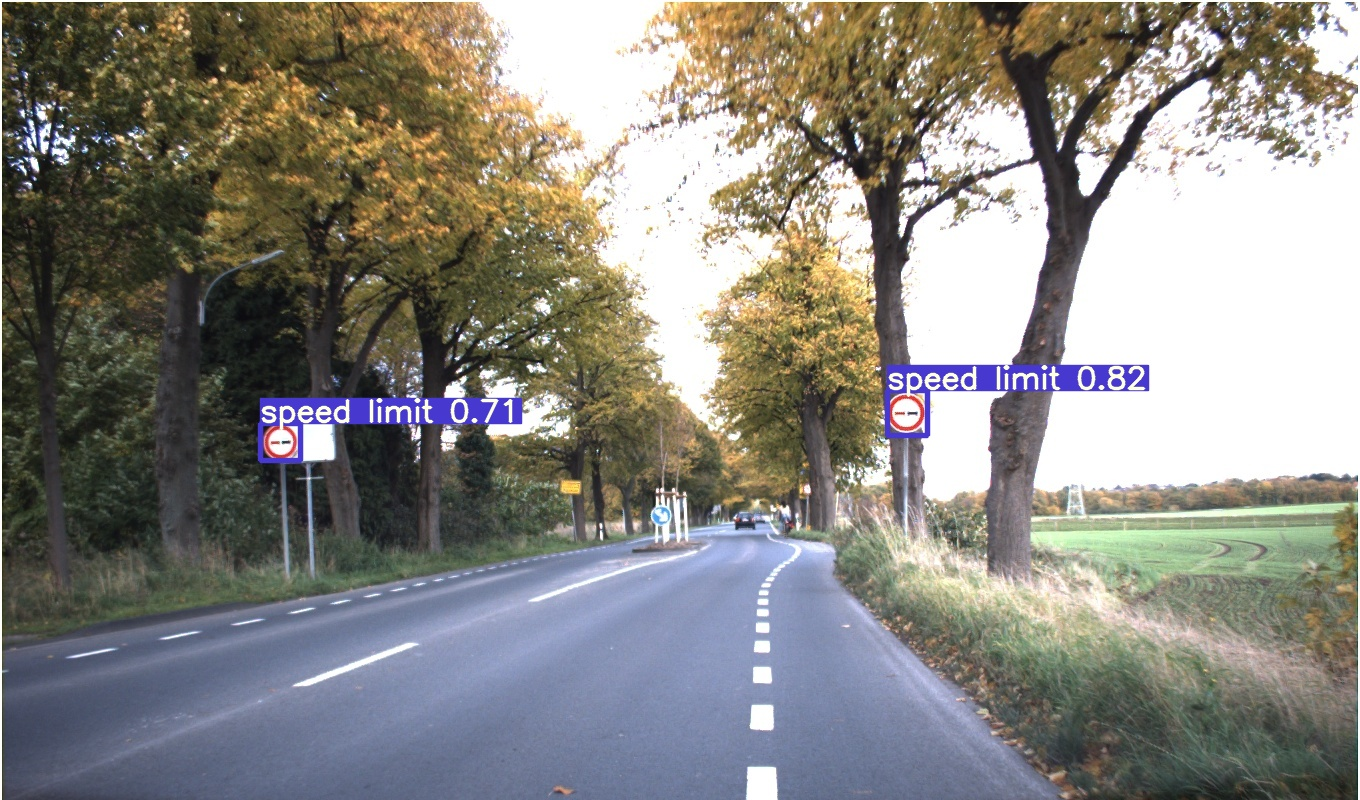

In [50]:
Image(filename='runs/detect/exp4/a.jpg', width=416)


In [16]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp2')  # plot results.txt as results.png